In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
import os
import process_data

In [2]:
parent_dir = os.path.abspath(os.path.join(os.getcwd(), ".."))
sys.path.append(parent_dir)

In [3]:
interpolated_dir = os.path.join(parent_dir, "dataset_interpolated_with_overtime")

In [17]:
features = ["score_difference", "relative_strength", "type.id", "home_has_possession", "end.down", "end.yardsToEndzone", "end.distance", "field_position_shift", "home_timeouts_left", "away_timeouts_left"]

In [18]:
interpolated_dir = os.path.join(parent_dir, "dataset_interpolated_with_overtime")
training_data = process_data.load_data(interpolated_dir, 
                                       years = [2016, 2017, 2018, 2019, 2020, 2021, 2022], 
                                       history_length = 0, 
                                       features = features, 
                                       label_feature = "final_score_difference")

test_data = process_data.load_data(interpolated_dir, 
                                       years = [2023, 2024], 
                                       history_length = 0, 
                                       features = features, 
                                       label_feature = "final_score_difference")


Loading data for 2022
Loading data for 2024
skipping  2024
Loading data for 2023
skipping  2023
Loading data for 2015
skipping  2015
Loading data for .DS_Store
Loading data for 2017
Loading data for 2019
Loading data for 2021
Loading data for 2020
Loading data for 2018
Loading data for 2016
Loading data for 2022
skipping  2022
Loading data for 2024
Loading data for 2023
Loading data for 2015
skipping  2015
Loading data for .DS_Store
Loading data for 2017
skipping  2017
Loading data for 2019
skipping  2019
Loading data for 2021
skipping  2021
Loading data for 2020
skipping  2020
Loading data for 2018
skipping  2018
Loading data for 2016
skipping  2016


In [15]:

for key in training_data.keys():
    if key > 0.99:
        print("Timestep {}".format(key))
        print(training_data[key])

Timestep 0.995
[{'rows': array([[-4.0]], dtype=object), 'label': -4.0}, {'rows': array([[-3.0]], dtype=object), 'label': -3.0}, {'rows': array([[-3.0]], dtype=object), 'label': -3.0}, {'rows': array([[-1.0]], dtype=object), 'label': -1.0}, {'rows': array([[-2.0]], dtype=object), 'label': -2.0}, {'rows': array([[-2.0]], dtype=object), 'label': -2.0}, {'rows': array([[-2.0]], dtype=object), 'label': -2.0}, {'rows': array([[-2.0]], dtype=object), 'label': -2.0}, {'rows': array([[-2.0]], dtype=object), 'label': -2.0}, {'rows': array([[-2.0]], dtype=object), 'label': -2.0}, {'rows': array([[4.0]], dtype=object), 'label': 4.0}, {'rows': array([[2.0]], dtype=object), 'label': 2.0}, {'rows': array([[2.0]], dtype=object), 'label': 2.0}, {'rows': array([[2.0]], dtype=object), 'label': 2.0}, {'rows': array([[-10.0]], dtype=object), 'label': -10.0}, {'rows': array([[-3.0]], dtype=object), 'label': -3.0}, {'rows': array([[-3.0]], dtype=object), 'label': -3.0}, {'rows': array([[-3.0]], dtype=object)

In [21]:
import sys
import importlib
# Remove modules from cache
modules_to_reload = [
    'kernel_methods.siamese_network',
    'kernel_methods.kernel_knn',
]

for module_name in modules_to_reload:
    if module_name in sys.modules:
        del sys.modules[module_name]

# Now import fresh
import kernel_methods.kernel_knn
importlib.reload(kernel_methods.kernel_knn)
kernel_methods.kernel_knn.setup_models(training_data, test_data, num_models=200, epochs=50)

Training set shape: (3187, 1, 10), Validation set shape: (994, 1, 10)
Training for timestep [0.995, 1.0]
Actual input dimension: 10


/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/torch/nn/modules/rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.3 and num_layers=1
  warnings.warn(


Created 95610 balanced pairs
Data loaded!
Created 19880 balanced pairs
Epoch 1/50, Train Loss: 0.895345, Train Acc: 0.6324, Val Loss: 0.707359, Val Acc: 0.7345
Epoch 2/50, Train Loss: 0.700311, Train Acc: 0.7594, Val Loss: 0.718226, Val Acc: 0.7275
Epoch 3/50, Train Loss: 0.628496, Train Acc: 0.7897, Val Loss: 0.709932, Val Acc: 0.7363
Epoch 4/50, Train Loss: 0.583065, Train Acc: 0.8037, Val Loss: 0.685318, Val Acc: 0.7570
Epoch 5/50, Train Loss: 0.550259, Train Acc: 0.8146, Val Loss: 0.661378, Val Acc: 0.7700
Epoch 6/50, Train Loss: 0.519511, Train Acc: 0.8258, Val Loss: 0.634029, Val Acc: 0.7849
Epoch 7/50, Train Loss: 0.492799, Train Acc: 0.8356, Val Loss: 0.644618, Val Acc: 0.7772
Epoch 8/50, Train Loss: 0.473097, Train Acc: 0.8418, Val Loss: 0.626598, Val Acc: 0.7870
Epoch 9/50, Train Loss: 0.457792, Train Acc: 0.8480, Val Loss: 0.628522, Val Acc: 0.7888
Epoch 10/50, Train Loss: 0.442592, Train Acc: 0.8535, Val Loss: 0.625085, Val Acc: 0.7931
Epoch 11/50, Train Loss: 0.433303, Tra

In [21]:

for timestep in training_data.keys():
    print(training_data[timestep][0].apply(type))
    break

home_team_id                      <class 'numpy.float64'>
away_team_id                      <class 'numpy.float64'>
home_win                          <class 'numpy.float64'>
sequenceNumber                              <class 'int'>
homeWinProbability                        <class 'float'>
homeScore                                 <class 'float'>
scoringPlay                                <class 'bool'>
priority                                   <class 'bool'>
statYardage                               <class 'float'>
awayScore                                 <class 'float'>
wallclock                                   <class 'str'>
modified                                    <class 'str'>
id                                        <class 'float'>
text                                        <class 'str'>
period.number                             <class 'float'>
start.distance                            <class 'float'>
start.yardLine                            <class 'float'>
start.team.id 

In [56]:
# Reload import
import importlib
import process_data
importlib.reload(process_data)



test_folders = process_data.load_test_data(interpolated_dir)

Loading data for 2022
Loading data for 2024
Loading data for 2023
Loading data for .DS_Store
Loading data for 2019
Loading data for 2021
Loading data for 2020
Loading data for 2018


In [38]:
features_test_data = {key: process_data.test_feature_selection(test_data, features) for key, test_data in zip(test_folders.keys(), test_folders.values())}

In [39]:
X_tests = [features_test_data[year] for year in features_test_data]
merged = {}
for d in X_tests:
    merged.update(d)
X_tests = merged
new_X_tests = {}
print(len(X_tests))
for file in X_tests:
   timestep = 0
   for i in range(len(X_tests[file])):
        if timestep not in new_X_tests:
           new_X_tests[timestep] = [X_tests[file][i]]
        else:
            new_X_tests[timestep] += [X_tests[file][i]]
        timestep += 0.005
X_tests = new_X_tests
# len(X_tests[0.1])
X_tests.keys()

544


dict_keys([0, 0.005, 0.01, 0.015, 0.02, 0.025, 0.030000000000000002, 0.035, 0.04, 0.045, 0.049999999999999996, 0.05499999999999999, 0.05999999999999999, 0.06499999999999999, 0.06999999999999999, 0.075, 0.08, 0.085, 0.09000000000000001, 0.09500000000000001, 0.10000000000000002, 0.10500000000000002, 0.11000000000000003, 0.11500000000000003, 0.12000000000000004, 0.12500000000000003, 0.13000000000000003, 0.13500000000000004, 0.14000000000000004, 0.14500000000000005, 0.15000000000000005, 0.15500000000000005, 0.16000000000000006, 0.16500000000000006, 0.17000000000000007, 0.17500000000000007, 0.18000000000000008, 0.18500000000000008, 0.19000000000000009, 0.1950000000000001, 0.2000000000000001, 0.2050000000000001, 0.2100000000000001, 0.2150000000000001, 0.2200000000000001, 0.22500000000000012, 0.23000000000000012, 0.23500000000000013, 0.24000000000000013, 0.24500000000000013, 0.2500000000000001, 0.2550000000000001, 0.2600000000000001, 0.2650000000000001, 0.27000000000000013, 0.2750000000000001

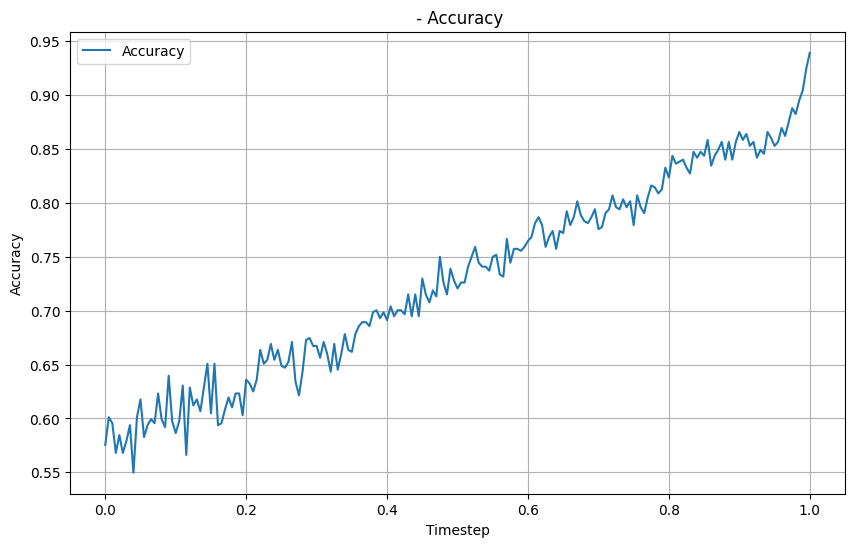

In [66]:
# Reload import
import importlib
import process_data
importlib.reload(process_data)
process_data.plot_accuracy(models, X_tests)

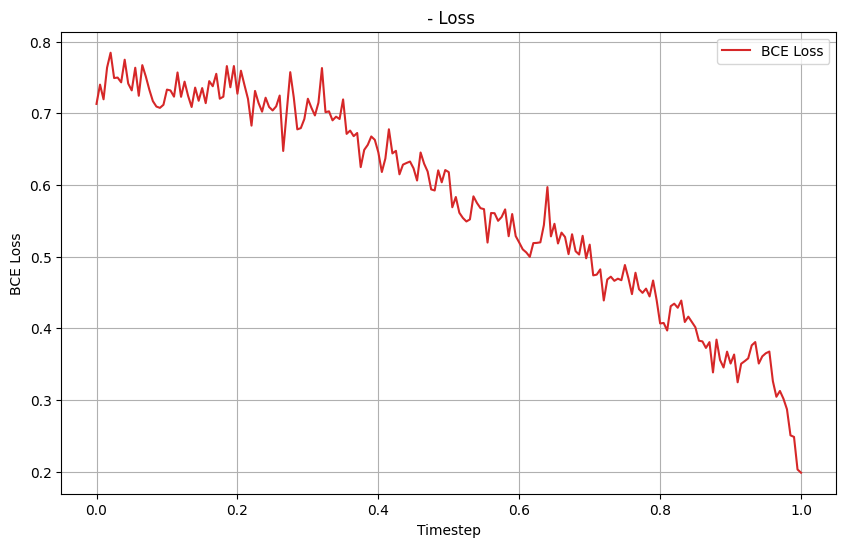

In [67]:
# Reload import
import importlib
import process_data
importlib.reload(process_data)
process_data.plot_loss(models, X_tests)

In [68]:
process_data.write_predictions(models, features_test_data, interpolated_dir, "cat_boost_phat_b")

2024
Finished writing to game_401671629.csv
Finished writing to game_401671601.csv
Finished writing to game_401671826.csv
Finished writing to game_401671832.csv
Finished writing to game_401671749.csv
Finished writing to game_401671775.csv
Finished writing to game_401671761.csv
Finished writing to game_401671760.csv
Finished writing to game_401671774.csv
Finished writing to game_401671748.csv
Finished writing to game_401671833.csv
Finished writing to game_401671827.csv
Finished writing to game_401671600.csv
Finished writing to game_401671628.csv
Finished writing to game_401671616.csv
Finished writing to game_401671831.csv
Finished writing to game_401671825.csv
Finished writing to game_401671819.csv
Finished writing to game_401671762.csv
Finished writing to game_401671776.csv
Finished writing to game_401671789.csv
Finished writing to game_401671788.csv
Finished writing to game_401671777.csv
Finished writing to game_401671763.csv
Finished writing to game_401671818.csv
Finished writing to 